<a href="https://colab.research.google.com/github/zhavkk/qwerty/blob/main/Decision_Trees_Home_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn 
import plotly.express as px

# Домашняя работа: деревья решений

В этой домашней работе вам предстоит научиться предсказывать цены товаров из маркетплейса Azamon.

Требования к домашней работе:
- Во всех графиках должны быть подписи через title, legend, etc.
- Во время обучения моделей проверяйте, что у вас не текут данные. Обычно это позитивно влияет на качество модели на тесте, но негативно влияет на оценку 🌚
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке.
- Использование мемов допускается, но необходимо соблюдать меру. Несодержательная работа, состоящая только из мемов, получает 0 баллов.

# Загрузка и подготовка данных

In [ ]:
df = pd.read_csv('amazon_co-ecommerce_sample.csv').drop(columns=[
    'product_name',
    'index',
    'uniq_id',
    'customers_who_bought_this_item_also_bought',
    'items_customers_buy_after_viewing_this_item',
    'sellers',
    'description', # text
    'product_information', # text
    'product_description', # text
    'customer_questions_and_answers', # text
    'customer_reviews', # text
])

## Очистка данных (1 балл)

Посмотрите на признаки. Есть ли в них пропуски? Какое соотношение между NaN'ами и общим количеством данных? Есть ли смысл выкидывать какие-либо данные из этого датасета?

In [ ]:
df.head()

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   manufacturer                      9993 non-null   object 
 1   price                             8565 non-null   object 
 2   number_available_in_stock         7500 non-null   object 
 3   number_of_reviews                 9982 non-null   object 
 4   number_of_answered_questions      9235 non-null   float64
 5   average_review_rating             9982 non-null   object 
 6   amazon_category_and_sub_category  9310 non-null   object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
df.dtypes

manufacturer                         object
price                                object
number_available_in_stock            object
number_of_reviews                    object
number_of_answered_questions        float64
average_review_rating                object
amazon_category_and_sub_category     object
dtype: object

In [ ]:
df.describe(include='all')

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
count,9993,8565,7500,9982,9235.000000,9982,9310
unique,2651,2625,89,194,NaN,19,255
top,LEGO,£9.99,2 new,1,NaN,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
freq,171,189,1337,4315,NaN,5140,880
mean,NaN,NaN,NaN,NaN,1.834976,NaN,NaN
std,NaN,NaN,NaN,NaN,2.517268,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN


In [ ]:
print(df['manufacturer'].isnull().sum(),df['price'].isnull().sum(),df['number_available_in_stock'].isnull().sum(),df['number_of_reviews'].isnull().sum(),df['number_of_answered_questions'].isnull().sum(),df['average_review_rating'].isnull().sum(),df['amazon_category_and_sub_category'].isnull().sum())

7 1435 2500 18 765 18 690


In [ ]:
len(df)

10000

In [ ]:
df.isnull().sum().sum()

5433

## Подготовка данных (3 балла)

Обработайте признаки. Выполните кодирование категориальных признаков, заполните пропуски в числовых признаках. Обратите внимание, что в датасете есть признак, который разбивается на несколько подпризнаков. Что это за признак? Закодируйте и его.

Дополнительные вопросы (+ 1 балл):
- Какие из признаков в этом датасете лучше кодировать через ordinal encoding?
- Какие из признаков допустимо кодировать через one-hot?

Прим.: суммарно за эту секцию можно получить до 4 баллов.

In [ ]:
df["number_of_answered_questions"].mean()

1.8349756361667569

In [ ]:
df["number_of_answered_questions"].value_counts()

1.0     6435
2.0     1469
3.0      566
4.0      235
5.0      161
6.0       82
11.0      79
9.0       54
7.0       46
12.0      22
13.0      21
23.0      14
39.0      14
19.0      13
10.0      11
8.0        7
28.0       4
14.0       1
17.0       1
Name: number_of_answered_questions, dtype: int64

In [ ]:
df = df.fillna({"number_of_answered_questions": "1"})
df

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
...,...,...,...,...,...,...,...
9995,Mattel,£22.95,5 new,3,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...
9996,Star Wars,£39.99,NaN,1,3,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys
9997,Olde Scotland Yard Ltd.,£43.99,3 new,1,3,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...
9998,DC Comics,£49.81,3 new,1,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...


In [ ]:
df['number_of_answered_questions'] = df['number_of_answered_questions'].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   manufacturer                      9993 non-null   object
 1   price                             8565 non-null   object
 2   number_available_in_stock         7500 non-null   object
 3   number_of_reviews                 9982 non-null   object
 4   number_of_answered_questions      10000 non-null  int64 
 5   average_review_rating             9982 non-null   object
 6   amazon_category_and_sub_category  9310 non-null   object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
encoder.fit(df)

OrdinalEncoder()

In [ ]:
df_new_ordinal = encoder.transform(df) 

In [ ]:
df_new_ordinal = pd.DataFrame(encoder.transform(df), columns=df.columns)

In [ ]:
df_new_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

In [ ]:
df_new_ordinal

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,1029.0,1417.0,64.0,54.0,0.0,17.0,164.0
1,801.0,695.0,NaN,74.0,0.0,13.0,164.0
2,2555.0,2587.0,28.0,64.0,1.0,7.0,164.0
3,1029.0,1719.0,NaN,0.0,1.0,18.0,164.0
4,1029.0,1535.0,NaN,102.0,1.0,15.0,164.0
...,...,...,...,...,...,...,...
9995,1388.0,1115.0,64.0,102.0,2.0,18.0,141.0
9996,2037.0,1719.0,NaN,0.0,2.0,8.0,50.0
9997,1576.0,1871.0,40.0,0.0,2.0,18.0,203.0
9998,534.0,1957.0,40.0,0.0,2.0,18.0,141.0


In [ ]:
na_columns = df_new_ordinal.isna().any()[df_new_ordinal.isna().any()]  # выведем только колонки с NaN'ами
na_columns

manufacturer                        True
price                               True
number_available_in_stock           True
number_of_reviews                   True
average_review_rating               True
amazon_category_and_sub_category    True
dtype: bool

In [ ]:
for na_column in na_columns.index:
    df_new_ordinal.loc[df_new_ordinal[na_column].isna(), na_column] = df_new_ordinal[~df_new_ordinal[na_column].isna()][na_column].mean()

In [ ]:
df_new_ordinal

,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category
0,1029.0,1417.0,64.000000,54.0,0.0,17.0,164.0
1,801.0,695.0,39.665333,74.0,0.0,13.0,164.0
2,2555.0,2587.0,28.000000,64.0,1.0,7.0,164.0
3,1029.0,1719.0,39.665333,0.0,1.0,18.0,164.0
4,1029.0,1535.0,39.665333,102.0,1.0,15.0,164.0
...,...,...,...,...,...,...,...
9995,1388.0,1115.0,64.000000,102.0,2.0,18.0,141.0
9996,2037.0,1719.0,39.665333,0.0,2.0,8.0,50.0
9997,1576.0,1871.0,40.000000,0.0,2.0,18.0,203.0
9998,534.0,1957.0,40.000000,0.0,2.0,18.0,141.0


In [ ]:
df_new_ordinal.isna().any().any() 

False

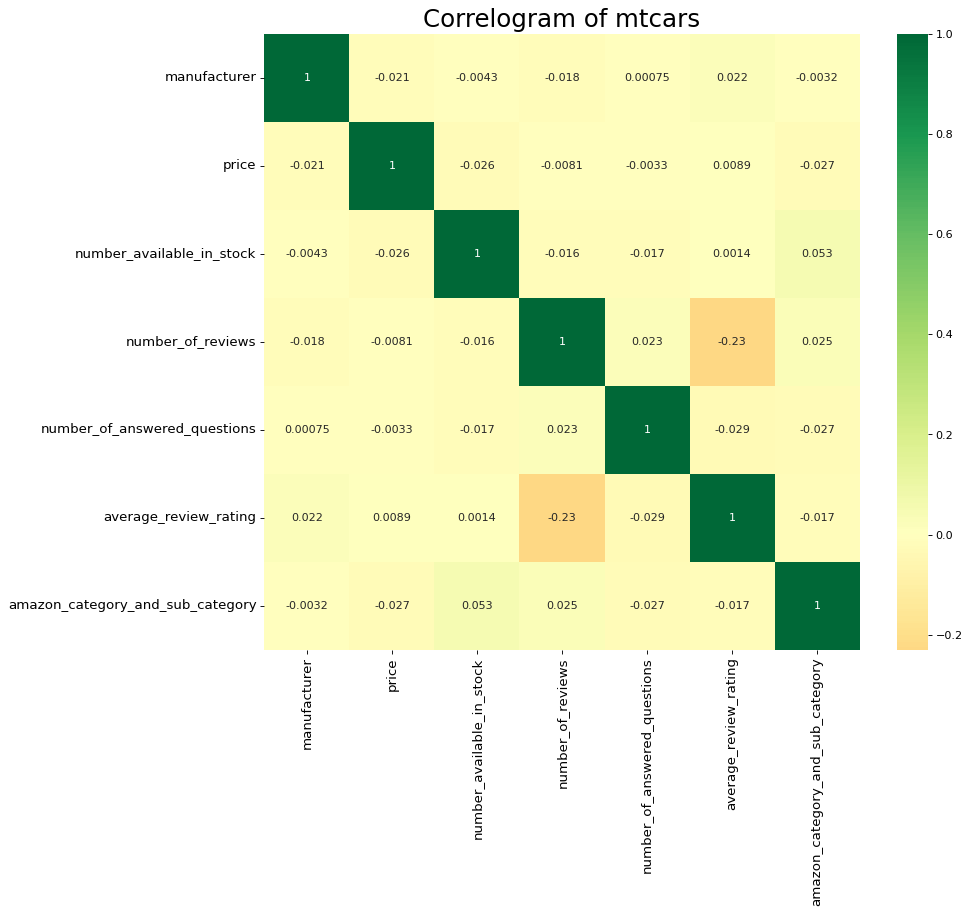

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_new_ordinal.corr(), xticklabels=df_new_ordinal.corr().columns, yticklabels=df_new_ordinal.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Обучение модели (3 балла)

## Бейзлайн

Обучите базовую модель. Для этого используйте `sklearn.dummy.DummyRegressor`. Какое качество она показывает на тесте? Посчитайте MSE, RMSE.

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")

In [ ]:
X = df_new_ordinal.drop(["price"],axis=1)
y = df_new_ordinal["price"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [ ]:
y_pred = dummy_regr.predict(X_test)

In [ ]:
y_pred = pd.Series(y_pred) 

In [ ]:
dummy_regr.score(X_test, y_test)

-0.0004336108094633584

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=False)

746.560462809861

In [ ]:
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred,squared=False))

27.323258641857873

## Дерево решений

Обучите регрессионное дерево решений, проверьте качество этой модели на тестовой выборке. Улучшилось ли качество по сравнению с базовой моделью? Оцените r2_score обученной модели.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_1)

0.05169139280033863

In [ ]:
r2_score(y_test, y_2)

0.06563870845560371

## Линейная регрессия

Попробуйте обучить линейную регрессию с параметрами по умолчанию. Оцените r2_score на тестовой выборке. Сравните качество с деревом решений. 

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_train,y_train)

0.0013793537904941422

In [ ]:
y_pr = reg.predict(X_test)

In [ ]:
r2_score(y_test, y_pr)

0.0020118346981226054

# Гиперпараметры (2 балла)

Переберите несколько гиперпараметров (не более двух-трёх). Обратите внимание, как эти параметры влияют на ошибку модели на тестовой выборке. Постройте для глубины дерева график переобучения (fitting curve) аналогичный тому, что мы строили на занятии. Найдите глубину дерева, начиная с которой модель начинает переобучаться.

In [ ]:
import seaborn as sns

def plot_fitting_curve(parameter: str, values: list, score, X_train, X_test, y_train, y_test):
    train_curve = []
    test_curve = []
    for value in values:
        # инициализация объекта из словаря
        # распаковка словаря через ** эквивалентна перечислению аргументов
        model = DecisionTreeRegressor(**{parameter: value})
        model.fit(X_train, y_train)
        y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
        train_curve.append(r2_score(y_train, y_pred_train))
        test_curve.append(r2_score(y_test, y_pred_test))
    ax = sns.lineplot(x=values, y=train_curve)
    ax = sns.lineplot(x=values, y=test_curve)
    ax.set(xlabel='values', ylabel='curve')
    plt.show()

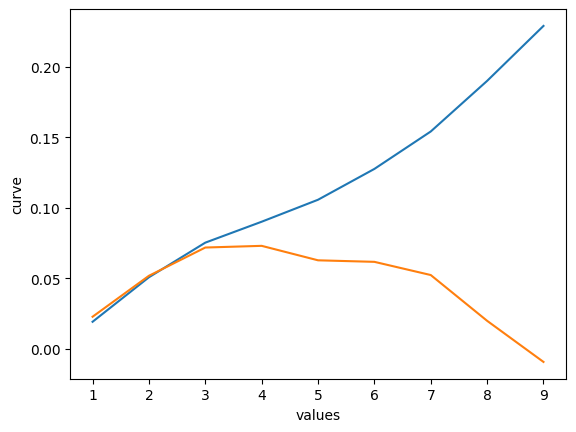

In [ ]:
from sklearn.metrics import f1_score


plot_fitting_curve('max_depth', np.arange(1, 10), f1_score, X_train, X_test, y_train, y_test)

# Простое ансамблирование (1 балл)

В этой секции мы реализуем простой ансамбль деревьев.

In [ ]:
class EnsembleTreeRegressor:
    def __init__(self, num_trees=5, samples_frac=0.8, **model_kwargs):
        self.num_trees= num_trees
        self._samples_frac = 0.8
        self._trees = [DecisionTreeRegressor(**model_kwargs) for _ in range(num_trees)]
    def fit(self, x, y: pd.Series):
        x = pd.DataFrame(x)
        y = y.reset_index(drop=True)
        for tree in self._trees:
            tree_x = x.sample(frac=self._samples_frac, random_state=42)
            tree_y = y[tree_x.index]
            tree.fit(tree_x, tree_y)
        return self

    def predict(self, x: pd.DataFrame):
        x = pd.DataFrame(x)
        res = []
        for i in range(self.num_trees):
          res.append(self._trees[i].predict(x))
        return sum(res) / len(res)

In [ ]:
es = EnsembleTreeRegressor()

In [ ]:
es.fit(X,y)

In [ ]:
y_p = es.predict(X)

In [ ]:
r2_score(y,y_p)

0.6178519758839617

Проверьте, работает ли этот ансамбль лучше обычного дерева с параметрами по умолчанию?

Дополнительно переберите максимальную глубину дерева. Проверьте, насколько отличается момент начала переобучения у одиночного дерева и у ансамбля. Зависит ли этот момент от числа деревьев (`num_trees`)? От числа примеров для каждого дерева (`samples_frac`)? Постройте график fitting curve.